In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import numpy as np

In [29]:

# Load the gold data
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_0)
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
995,2010-01-07 06:40:00,1131.73,1131.85,1130.70,1131.05,47.60,1131.43
996,2010-01-07 06:45:00,1131.03,1131.05,1129.95,1130.05,42.59,1131.39
997,2010-01-07 06:50:00,1130.28,1130.55,1130.05,1130.25,43.86,1131.34
998,2010-01-07 06:55:00,1130.23,1130.45,1130.05,1130.10,43.09,1131.33


In [3]:

# Preprocess the data
df = df.dropna()  # Handle missing values

In [4]:
df['Date'] = pd.to_datetime(df['time'])

In [5]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: Year, dtype: int32

In [6]:
# extract month from date

df['Month'] = df['Date'].dt.month
df['Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int32

In [7]:
# extract day from date
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day, dtype: int32

In [311]:
# again view the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    100000 non-null  object        
 1   open    100000 non-null  float64       
 2   high    100000 non-null  float64       
 3   low     100000 non-null  float64       
 4   close   100000 non-null  float64       
 5   rsi14   100000 non-null  float64       
 6   sma14   100000 non-null  float64       
 7   Date    100000 non-null  datetime64[ns]
 8   Year    100000 non-null  int32         
 9   Month   100000 non-null  int32         
 10  Day     100000 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 7.2+ MB


In [8]:

# Select relevant columns
df = df[['open', 'high', 'low', 'close']]
df

,open,high,low,close
0,1098.45,1100.00,1098.05,1099.95
1,1100.00,1100.30,1099.45,1099.75
2,1099.70,1100.10,1099.30,1099.45
3,1099.50,1099.60,1098.50,1099.45
4,1099.40,1099.60,1098.90,1098.90
...,...,...,...,...
995,1131.73,1131.85,1130.70,1131.05
996,1131.03,1131.05,1129.95,1130.05
997,1130.28,1130.55,1130.05,1130.25
998,1130.23,1130.45,1130.05,1130.10


In [30]:
# Label the data
df['price_high'] = (df['high'] > df['close']).astype(int)
df['price_low'] = (df['low'] < df['close']).astype(int)
df['price_high_same'] = (df['high'] == df['close']).astype(int)
df['price_low_same'] = (df['low'] == df['close']).astype(int)

In [10]:
# df['price_high'].plot.hist()
np.bincount(df['price_high'])

array([ 91, 909], dtype=int64)

In [293]:
np.bincount(df['price_low'])

array([ 74, 926], dtype=int64)

In [275]:
np.bincount(df['price_high_same'])

array([1000], dtype=int64)

In [276]:
np.bincount(df['price_low_same'])

array([1000], dtype=int64)

In [31]:

df['price_same'] = (df['price_low_same'] | df['price_high_same']).astype(int)
# df['price_same'] = (df['price_high_same'] == 1).astype(int)
np.bincount(df['price_same'])
df['price_same'].value_counts()

price_same
0    839
1    161
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

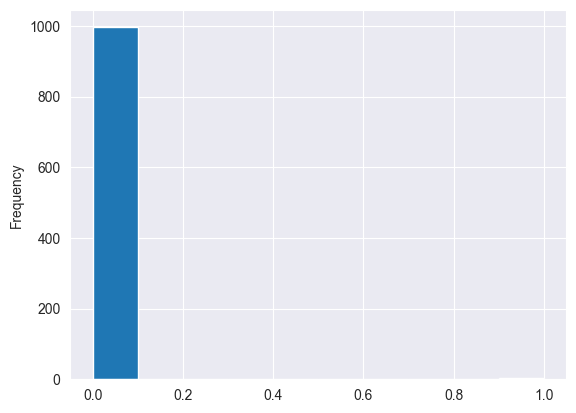

In [12]:
# Define the conditions for each possible combination

# Define the conditions for each status
conditions = [
    (df['price_high'] == 1) | (df['price_low'] == 1),  # change
    (df['price_high_same'] == 1) | (df['price_low_same'] == 1)  # same
]

# Define the corresponding choices
choices = [0, 1, ]
# Apply the conditions to create the status column
df['status'] = np.select(conditions, choices, default=-1)
df['status'].plot.hist()

In [15]:
np.bincount(df['status'])

array([996,   4], dtype=int64)

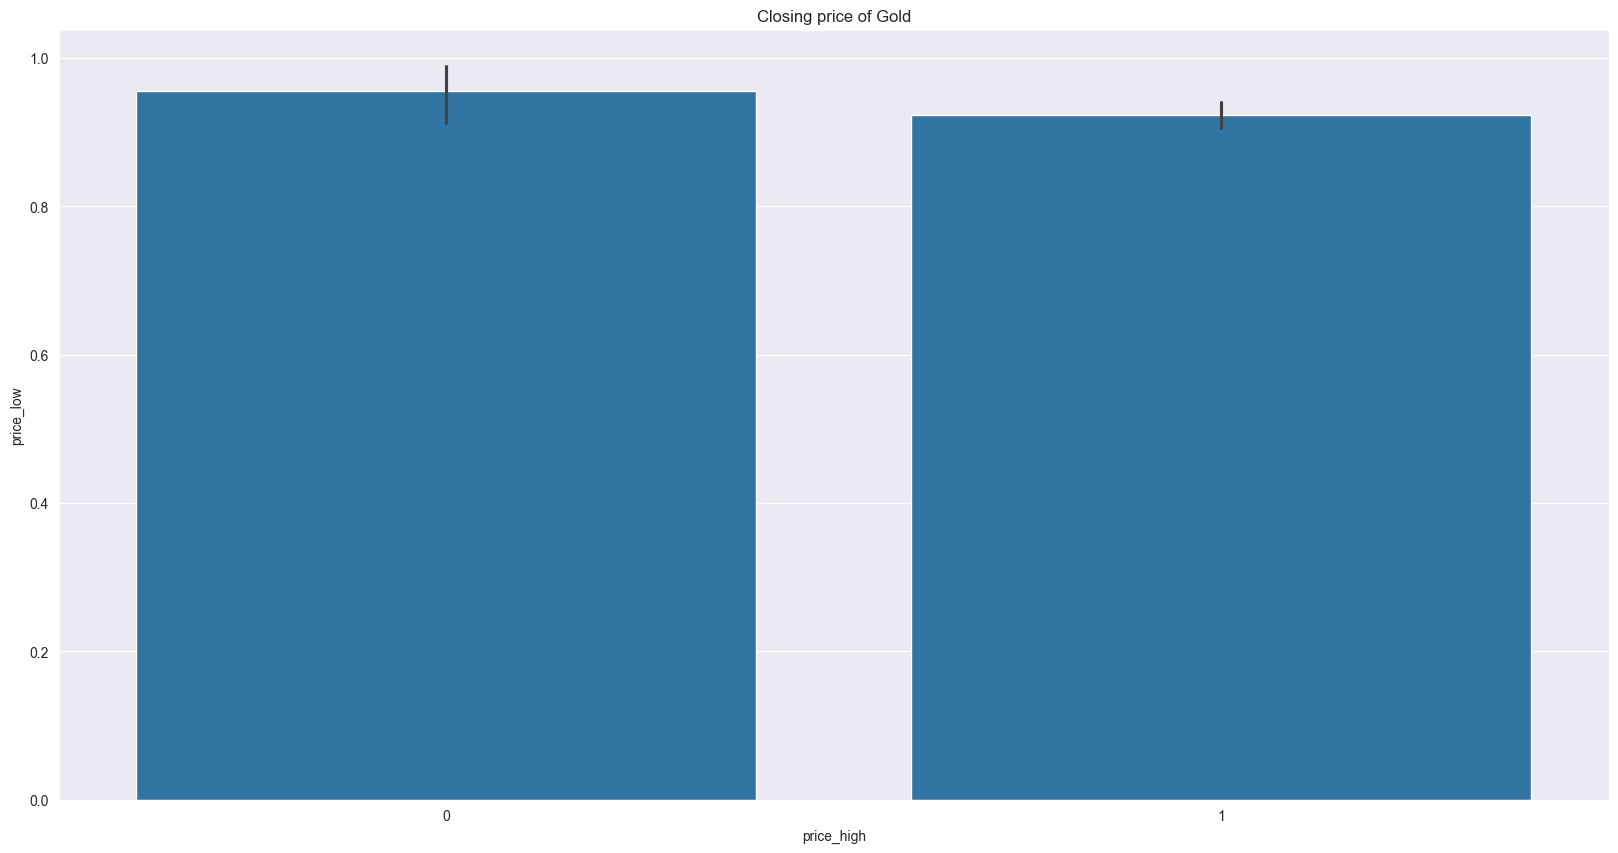

In [16]:

plt.figure(
    figsize=(
        20,  #panjang
        10  # lebar
    ))
sns.barplot(df, x="price_high", y="price_low")
plt.title('Closing price of Gold')
plt.show()

In [17]:

# Normalize the data
scaler = StandardScaler()
df[['open', 'high', 'low', 'close', ]] = scaler.fit_transform(df[['open', 'high', 'low', 'close']])

In [24]:

X = df[['open', 'high', 'low', 'close']]
Y = df['price_same']

In [28]:

X.value_counts()

open       high       low        close    
-0.076641  -0.122951  -0.034740  -0.079755    2
-2.728051  -2.640923  -2.698393  -2.622928    1
 0.302678   0.256417   0.238333   0.198030    1
 0.264460   0.318531   0.307319   0.346502    1
            0.495314   0.302529   0.539994    1
                                             ..
-0.162632  -0.118173  -0.133429  -0.113281    1
-0.160721  -0.161174  -0.152592  -0.194701    1
-0.157855  -0.144929  -0.143010  -0.101786    1
           -0.127729  -0.154508  -0.092208    1
 1.673768   1.642019   1.639146   1.596536    1
Name: count, Length: 999, dtype: int64

In [26]:

print(Y.value_counts())

open       high       low        close    
-0.076641  -0.122951  -0.034740  -0.079755    2
-2.728051  -2.640923  -2.698393  -2.622928    1
 0.302678   0.256417   0.238333   0.198030    1
 0.264460   0.318531   0.307319   0.346502    1
            0.495314   0.302529   0.539994    1
                                             ..
-0.162632  -0.118173  -0.133429  -0.113281    1
-0.160721  -0.161174  -0.152592  -0.194701    1
-0.157855  -0.144929  -0.143010  -0.101786    1
           -0.127729  -0.154508  -0.092208    1
 1.673768   1.642019   1.639146   1.596536    1
Name: count, Length: 999, dtype: int64
price_same
0    839
1    161
Name: count, dtype: int64


In [18]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42)

In [19]:
print(len(X_train))
print(len(X_test))


800
200


In [20]:

# Create the classification model
model = LogisticRegression()

In [21]:

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [22]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.845
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       169
           1       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200

Confusion Matrix:
[[169   0]
 [ 31   0]]


C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[169   0]
 [ 31   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       169
           1       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200


Accuracy Score:
0.845


C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


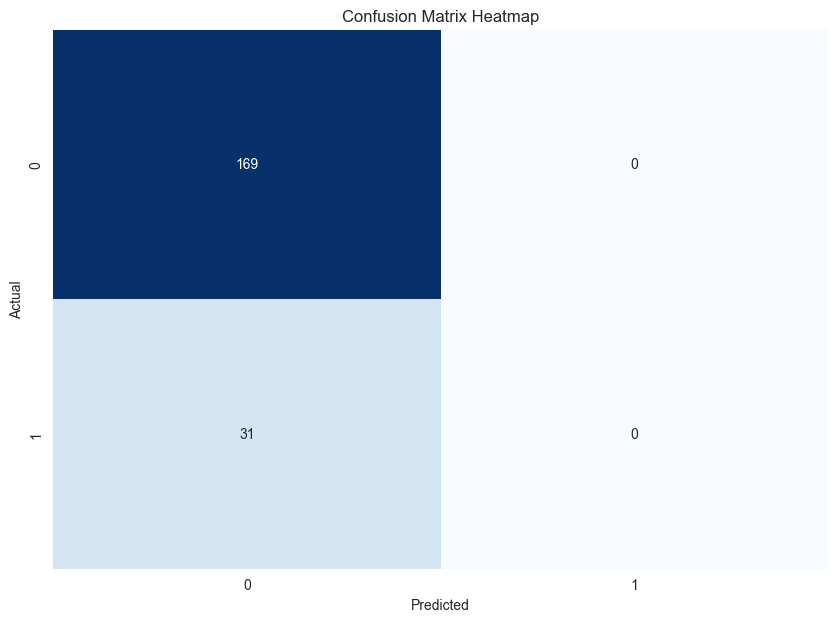

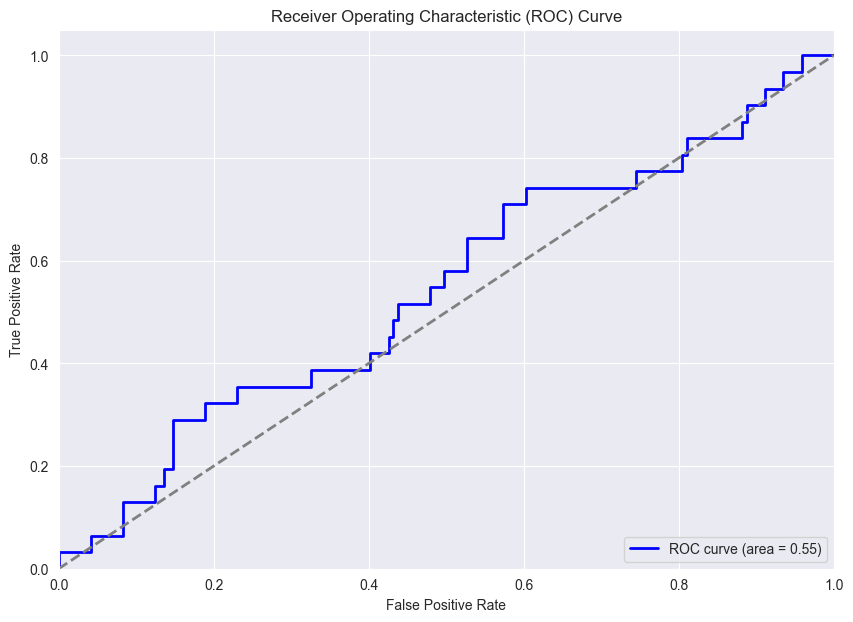

In [300]:

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the classifier's performance
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()